In [3]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob
from eofs.xarray import Eof
import obsinfo as obs
from myplot import *
import obsinfo as obs
from obsinfo import *
import matplotlib.path as mpath



source='/home/msantolaria/Documents/MyResearch/GabiSAM/UBSam/'
#resultsDir=source + 'Results/'
#plotsDir='/home/msantolaria/Documents/MyResearch/MassBalanceSAM/OutputSeptiembre2022/'
plotsDir='/home/msantolaria/Documents/MyResearch/MassBalanceSAM/OutputApril2024/'

#resultsDir='/media/maria/MARIAEXT2/WinterTrendsObs/'
sourceData='/home/msantolaria/Documents/Data/'

In [4]:
iyr=1980
fyr=2014
mapa=True

domain='SHWest'
variable='t925'
units='K'
model=str('eraint')
fileName ='t925.mon.eraint_197901_201512.nc'
ds = xr.open_dataset(sourceData+model+'/'+fileName)['t']

ds = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180))
ds = ds.roll(longitude=int(len(ds['longitude']) / 2), roll_coords=True)
#field=dom.field_dom(ds,domain)

lat,lon=climb.latlon(ds)
ylat=ds.coords['latitude']
xlon=ds.coords['longitude']

field=ds.sel(latitude=slice(-20,-90),longitude=slice(-170,-10))
#latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)
#field=dom.field_sel_dom(ds,domain)
print(ds.units)

K


In [5]:
xlon

<xarray.DataArray 'longitude' (longitude: 144)>
array([-180. , -177.5, -175. , -172.5, -170. , -167.5, -165. , -162.5, -160. ,
       -157.5, -155. , -152.5, -150. , -147.5, -145. , -142.5, -140. , -137.5,
       -135. , -132.5, -130. , -127.5, -125. , -122.5, -120. , -117.5, -115. ,
       -112.5, -110. , -107.5, -105. , -102.5, -100. ,  -97.5,  -95. ,  -92.5,
        -90. ,  -87.5,  -85. ,  -82.5,  -80. ,  -77.5,  -75. ,  -72.5,  -70. ,
        -67.5,  -65. ,  -62.5,  -60. ,  -57.5,  -55. ,  -52.5,  -50. ,  -47.5,
        -45. ,  -42.5,  -40. ,  -37.5,  -35. ,  -32.5,  -30. ,  -27.5,  -25. ,
        -22.5,  -20. ,  -17.5,  -15. ,  -12.5,  -10. ,   -7.5,   -5. ,   -2.5,
          0. ,    2.5,    5. ,    7.5,   10. ,   12.5,   15. ,   17.5,   20. ,
         22.5,   25. ,   27.5,   30. ,   32.5,   35. ,   37.5,   40. ,   42.5,
         45. ,   47.5,   50. ,   52.5,   55. ,   57.5,   60. ,   62.5,   65. ,
         67.5,   70. ,   72.5,   75. ,   77.5,   80. ,   82.5,   85. ,   87.5,
         90. ,   92.5,   95. ,   97.5,  100. ,  102.5,  105. ,  107.5,  110. ,
        112.5,  115. ,  117.5,  120. ,  122.5,  125. ,  127.5,  130. ,  132.5,
        135. ,  137.5,  140. ,  142.5,  145. ,  147.5,  150. ,  152.5,  155. ,
        157.5,  160. ,  162.5,  165. ,  167.5,  170. ,  172.5,  175. ,  177.5],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5

In [48]:
# Opening files
variable2='wind'
data2='eraint'
#filenameu = sourceData+'u925.mon.eraint_197901_201512.nc'
#filenamev = sourceData+'v925.mon.eraint_197901_201512.nc'
filenameu = sourceData+model+'/'+'u925.mon.eraint_197901_201512.nc'
filenamev= sourceData+model+'/'+'v925.mon.eraint_197901_201512.nc'

dsu0 = xr.open_dataset(filenameu)['u']
dsu0 = dsu0.assign_coords(longitude=(((dsu0.longitude + 180) % 360) - 180))
dsu = dsu0.roll(longitude=int(len(dsu0['longitude']) / 2), roll_coords=True)

dsv0 = xr.open_dataset(filenamev)['v']
dsv0 = dsv0.assign_coords(longitude=(((dsv0.longitude + 180) % 360) - 180))
dsv = dsv0.roll(longitude=int(len(dsv0['longitude']) / 2), roll_coords=True)

unitsw=dsv.units
lat,lon=climb.latlon(dsu)
ylat=dsu.coords['latitude']
xlon=dsu.coords['longitude']

fieldu=dsu.sel(latitude=slice(-20,-90),longitude=slice(-170,-10))
fieldv=dsv.sel(latitude=slice(-20,-90),longitude=slice(-170,-10))

In [1]:
xlon

NameError: name 'xlon' is not defined

In [56]:
#-----------------------------------------
rList=[]
pList=[]
index_name='GabiSAM'
#Regression
sourceIndex='/home/msantolaria/Documents/MyResearch/MassBalanceSAM/UBSam/Index/'
mode='SAM'
seasons=['DJF','MAM','JJA','SON']
for season in seasons:
    if season=='DJF':
        indexName=mode+'_'+season+'_19791980_20132014.txt'
        index=np.loadtxt(sourceIndex+indexName)
        print(indexName)
        print(index.shape)
        vals,anoms=climb.seasonal_selection(field,season,iyr-1,fyr-1)
        anoms_detrend=climb.detrend_dim(vals, 'time', deg=1)
    else:
        indexName=mode+'_'+season+'_1980_2014.txt'
        index=np.loadtxt(sourceIndex+indexName)
        print(indexName)
        print(index.shape)
        vals,anoms=climb.seasonal_selection(field,season,iyr,fyr)
        anoms_detrend=climb.detrend_dim(vals, 'time', deg=1)
    par=climb.trend_vect(index,anoms,'time')
    #trend=par[0]
    #intercept=par[1]
    rvalue=par[2]
    pvalue=par[3]
    #stderr=par[4]
    rList.append(rvalue)
    pList.append(pvalue)

SAM_DJF_19791980_20132014.txt
(35,)
(D- 1979  JF- 1980  to D- 2013 JF- 2014
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
SAM_MAM_1980_2014.txt
(35,)
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
SAM_JJA_1980_2014.txt
(35,)
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
SAM_SON_1980_2014.txt
(35,)
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


In [57]:
#-----------------------------------------
ruList=[]
puList=[]
rvList=[]
pvList=[]
pwList=[]
#Regression
sourceIndex='/home/msantolaria/Documents/MyResearch/MassBalanceSAM/UBSam/Index/'
mode='SAM'
seasons=['DJF','MAM','JJA','SON']
for season in seasons:
    if season=='DJF':
        indexName=mode+'_'+season+'_19791980_20132014.txt'
        index=np.loadtxt(sourceIndex+indexName)
        print(indexName)
        print(index.shape)
        valsu,anomsu=climb.seasonal_selection(fieldu,season,iyr-1,fyr-1)
        #anomsu_detrend=climb.detrend_dim(valsu, 'time', deg=1)
        valsv,anomsv=climb.seasonal_selection(fieldv,season,iyr-1,fyr-1)
        #anomsv_detrend=climb.detrend_dim(valsv, 'time', deg=1)        
    else:
        indexName=mode+'_'+season+'_1980_2014.txt'
        index=np.loadtxt(sourceIndex+indexName)
        print(indexName)
        print(index.shape)
        valsu,anomsu=climb.seasonal_selection(fieldu,season,iyr,fyr)
        #anomsu_detrend=climb.detrend_dim(valsu, 'time', deg=1)
        valsv,anomsv=climb.seasonal_selection(fieldv,season,iyr,fyr)
        #anomsv_detrend=climb.detrend_dim(valsv, 'time', deg=1)             
    paru=climb.trend_vect(index,anomsu,'time')
    #trend=par[0]
    #intercept=par[1]
    ruvalue=paru[0]
    puvalue=paru[3]
    #stderr=par[4]
    ruList.append(ruvalue)
    puList.append(puvalue)
    parv=climb.trend_vect(index,anomsv,'time')
    #trend=par[0]
    #intercept=par[1]
    rvvalue=parv[0]
    pvvalue=parv[3]
    #stderr=par[4]
    rvList.append(rvvalue)
    pvList.append(pvvalue)  
    pw=np.where(pvvalue>puvalue,puvalue,pvvalue) #take the lowest p-value of both u,v
    pwList.append(pw)

SAM_DJF_19791980_20132014.txt
(35,)
(D- 1979  JF- 1980  to D- 2013 JF- 2014
(D- 1979  JF- 1980  to D- 2013 JF- 2014
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
SAM_MAM_1980_2014.txt
(35,)
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
SAM_JJA_1980_2014.txt
(35,)
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
SAM_SON_1980_2014.txt
(35,)
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


In [58]:
'''
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)
nrows=4
ncols=1
clevs=np.arange(-1.0,1.1,0.1)
#color='PiYG'
cmap='bwr'
exp='obs'
decomp='original'
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(16,18))
axs=axs.flatten()

for i in np.arange(0,len(ruList),1):
    lons, lats = np.meshgrid(ruList[i][lon],ruList[i][lat])

#    CS1=axs[i].contourf(lons,lats, pwList[i][:,:],
#                transform=ccrs.PlateCarree(),
#                cmap=color,extent='both')
    #xw,yw=m(lons,lats)
    delta=3
 # Add arrows to show the wind vectors
    Q1=axs[i].quiver(lons[::delta,::delta],lats[::delta,::delta],ruList[i][::delta,::delta],rvList[i][::delta,::delta],pivot='middle', 
                     transform=ccrs.PlateCarree(),
        angles="xy",
        scale_units="xy",
        scale=0.10,color='black',
        #minshaft=4,
       # minlength=0.1,
       # width=0.1
             )
    #Q1=axs[i].quiver(lons,lats, ruList[i][:,:], rvList[i][:,:], pivot='middle', 
   #                  transform=ccrs.PlateCarree(),
   #     angles="xy",
    #    scale_units="xy",
   #     scale=0.25,color='black',
        #minshaft=4,
       # minlength=0.1,
       # width=0.1
   #          )
# Normalise the data for uniform arrow size
#u_norm = u / np.sqrt(u ** 2.0 + v ** 2.0)
#v_norm = v / np.sqrt(u ** 2.0 + v ** 2.0)
#plt.quiver(x, y, u_norm, v_norm, pivot='middle', transform=transform)
#plt.quiverkey(Q1, 1.2, 0.515, 2, 'arrow 1', coordinates='data')
    axs[i].quiverkey(Q1,                      #Incoming quiver handle
              X=0.07, Y = -0.05,       #Determine the location of label, all limited to [0,1]
              U = 1,                   #Reference arrow length means the wind speed is 5m/s.
             angle = 0,            #Reference arrow placement angle. The default is 0,
             label='1m/s',        #Arrow's supplement: label's content + 
             labelpos='E',          #label is in which direction of the reference arrow; S means south
             color = 'black',labelcolor = 'black')#,bbox={'edge':True, 'fill':True})
    levels=[0,0.1,1.0]
    cs = axs[i].contourf(lons,lats,pwList[i][:,:], transform=ccrs.PlateCarree(),levels=levels,
                 hatches=["\\", ""], alpha=0.)
        # Title each subplot with the name of the model
    axs[i].text(-0.12, 0.5, seasons[i],
    verticalalignment='center', horizontalalignment='left',
    transform=axs[i].transAxes,
    color='black', fontsize=12)
    geom = geometry.box(minx=-77,maxx=-73,miny=-44.7,maxy=-49.3)
    axs[i].add_geometries([geom], facecolor='chartreuse',edgecolor='chartreuse',crs=ccrs.PlateCarree(), alpha=0.8)
    # Draw the coastines for each subplot
    axs[i].coastlines()
    axs[i].add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
    axs[i].add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='none'))
    axs[i].set_extent([lonW, lonE, latS,latN])
    # Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.20, top=0.64, left=0.25, right=0.75,
                    wspace=0.0000000005, hspace=0.20)
    # Add a colorbar axis at the bottom of the graph
    #([xmin,ymin,dx,dy])
#cbar_ax = fig.add_axes([0.2, 0.3, 0.6, 0.02])
    # Draw the colorbar
#cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s'%(units))
    ## Add a big title at the top
    #plt.suptitle('%s'%(seasons[i]),y=0.73)
plt.suptitle('(a)',y=0.67)
plotname='spa_cor_%s_%s_%s_seasons_%s_%i-%i'%('wind925hPa',model,index_name,domain,iyr,fyr)
plt.savefig(plotsDir+plotname+'_4paper'+'.png',format='png')
plt.show()
'''

'\nlatS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)\nnrows=4\nncols=1\nclevs=np.arange(-1.0,1.1,0.1)\n#color=\'PiYG\'\ncmap=\'bwr\'\nexp=\'obs\'\ndecomp=\'original\'\nfig, axs = plt.subplots(nrows=nrows,ncols=ncols,\n                        subplot_kw={\'projection\': ccrs.PlateCarree()},figsize=(16,18))\naxs=axs.flatten()\n\nfor i in np.arange(0,len(ruList),1):\n    lons, lats = np.meshgrid(ruList[i][lon],ruList[i][lat])\n\n#    CS1=axs[i].contourf(lons,lats, pwList[i][:,:],\n#                transform=ccrs.PlateCarree(),\n#                cmap=color,extent=\'both\')\n    #xw,yw=m(lons,lats)\n    delta=3\n # Add arrows to show the wind vectors\n    Q1=axs[i].quiver(lons[::delta,::delta],lats[::delta,::delta],ruList[i][::delta,::delta],rvList[i][::delta,::delta],pivot=\'middle\', \n                     transform=ccrs.PlateCarree(),\n        angles="xy",\n        scale_units="xy",\n        scale=0.10,color=\'black\',\n        #minshaft=4,\n       # minlength=0.1,\n       # wid

In [59]:
'''
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)
nrows=4
ncols=1
clevs=np.arange(-1.0,1.1,0.1)
#color='PiYG'
cmap='bwr'
exp='obs'
decomp='original'
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(16,18))
axs=axs.flatten()
#Loop over all of the models
for i in np.arange(0,len(rList),1):
        lat,lon=climb.latlon(rList[i])
        lons, lats = np.meshgrid(rList[i][lon],rList[i][lat])
        # Contour plot
        CS1=axs[i].contourf(lons, lats, rList[i],clevs,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap)
        #CS1=axs[i].contourf(lons, lats, rList[i].where(pList[i] <0.1),clevs,
      #              transform=ccrs.PlateCarree(),
      #              cmap=cmap)
        levels=[0,0.1,1.0]
        cs = axs[i].contourf(lons,lats,pList[i][:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)
        # Title each subplot with the name of the model
#        axs[i].text(-0.1, 0.5, seasons[i],
  #      verticalalignment='center', horizontalalignment='left',
 #       transform=axs[i].transAxes,
  #      color='black', fontsize=12)
  #      geom = geometry.box(minx=-77,maxx=-73,miny=-44.7,maxy=-49.3)
        axs[i].add_geometries([geom], facecolor='chartreuse',edgecolor='chartreuse',crs=ccrs.PlateCarree(), alpha=0.8)
        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
        axs[i].add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='none'))
        axs[i].set_extent([lonW, lonE, latS,latN])
    # Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.20, top=0.64, left=0.25, right=0.75,
                    wspace=0.0000000005, hspace=0.20)

#plt.tight_layout()
#cax=fig.add_axes([left,bottom,width,height]
#cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
#cbar=fig.colorbar(CS1,cax=cbar_ax,orientation='horizontal',label='%s'%(units))
cbar_ax = fig.add_axes([0.65, 0.225, 0.02, 0.4])
cbar=fig.colorbar(CS1,cax=cbar_ax,orientation='vertical',label='')
plt.suptitle('(b)',y=0.67)
plotname='spa_cor_%s_%s_%s_seasons_%s_%i-%i'%(variable,model,index_name,domain,iyr,fyr)
plt.savefig(plotsDir+plotname+'_4paper'+'.png',format='png')
plt.show()
'''

'\nlatS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)\nnrows=4\nncols=1\nclevs=np.arange(-1.0,1.1,0.1)\n#color=\'PiYG\'\ncmap=\'bwr\'\nexp=\'obs\'\ndecomp=\'original\'\nfig, axs = plt.subplots(nrows=nrows,ncols=ncols,\n                        subplot_kw={\'projection\': ccrs.PlateCarree()},figsize=(16,18))\naxs=axs.flatten()\n#Loop over all of the models\nfor i in np.arange(0,len(rList),1):\n        lat,lon=climb.latlon(rList[i])\n        lons, lats = np.meshgrid(rList[i][lon],rList[i][lat])\n        # Contour plot\n        CS1=axs[i].contourf(lons, lats, rList[i],clevs,\n                    transform=ccrs.PlateCarree(),\n                    cmap=cmap)\n        #CS1=axs[i].contourf(lons, lats, rList[i].where(pList[i] <0.1),clevs,\n      #              transform=ccrs.PlateCarree(),\n      #              cmap=cmap)\n        levels=[0,0.1,1.0]\n        cs = axs[i].contourf(lons,lats,pList[i][:,:], transform=ccrs.PlateCarree(),levels=levels,\n                hatches=["+", ""], alph

In [60]:
#clevs00=np.arange(-1,1.1,0.1)


In [69]:
clevs=[-1., -0.9,-0.8,-0.7, -0.6,-0.5,-0.4 ,-0.3,-0.2 ,-0.1,0.1, 0.2 , 0.3,
  0.4 , 0.5,0.6  , 0.7,0.8 , 0.9,1. ]
assert len(clevs) % 2 == 0, 'N levels must be even.'
cmap = mcolors.LinearSegmentedColormap.from_list(name='red_white_blue', 
                                                 colors =[(0, 0, 1), 
                                                          (1, 1., 1), 
                                                          (1, 0, 0)],
                                                 N=len(clevs)-1,
                                                 )
#levs_ticks=[-1., -0.8, -0.6,-0.4 ,-0.2 , 0.2 , 
#  0.4 , 0.6  , 0.8 , 1. ]
levs_ticks=[-.9, -0.7, -0.5,-0.3 ,-0.1 , 0.1 , 
  0.3 , 0.5  , 0.7 , 0.9 ]    

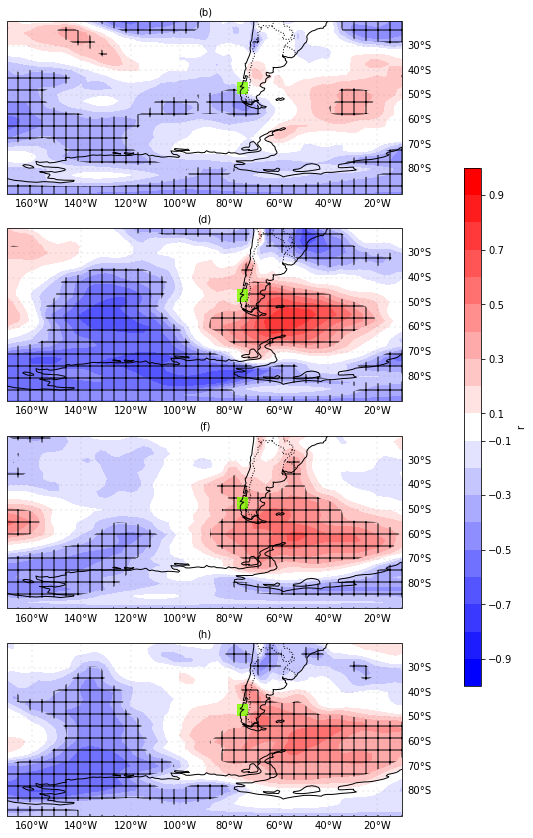

In [84]:
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)
nrows=4
ncols=1
#clevs=np.arange(-1.0,1.1,0.1)
#color='PiYG'
#cmap='bwr'
exp='obs'
decomp='original'
titleList=['(b)','(d)','(f)','(h)']
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(12,24))
axs=axs.flatten()
#Loop over all of the models
for i in np.arange(0,len(rList),1):
        lat,lon=climb.latlon(rList[i])
        lons, lats = np.meshgrid(rList[i][lon],rList[i][lat])
        # Contour plot
        CS1=axs[i].contourf(lons, lats, rList[i],clevs,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap)
        #CS1=axs[i].contourf(lons, lats, rList[i].where(pList[i] <0.1),clevs,
      #              transform=ccrs.PlateCarree(),
      #              cmap=cmap)
        levels=[0,0.1,1.0]
        cs = axs[i].contourf(lons,lats,pList[i][:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)
        # Title each subplot with the name of the model
#        axs[i].text(-0.1, 0.5, seasons[i],
  #      verticalalignment='center', horizontalalignment='left',
 #       transform=axs[i].transAxes,
  #      color='black', fontsize=12)
        gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.1, linestyle=':')
        gl.xlabels_top = False
        gl.ylabels_right = True
        gl.ylabels_left = False
        gl.set_ylocator=mticker.FixedLocator(np.arange(latS,latN,15),0)
        gl.set_xlocator = mticker.FixedLocator(np.arange(lonW,lonE,10),0)
        gl.set_xformatter = LongitudeFormatter
        gl.set_yformatter = LatitudeFormatter
        gl.set_xlabel_style = {'color': 'black'}
        gl.set_xlabel_style = {'color': 'black'}
        geom = geometry.box(minx=-77,maxx=-73,miny=-44.7,maxy=-49.3)
        axs[i].add_geometries([geom], facecolor='chartreuse',edgecolor='chartreuse',crs=ccrs.PlateCarree(), alpha=0.8)
        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].set_title(titleList[i],fontsize=10)
        axs[i].add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
        axs[i].add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='none'))
        axs[i].set_extent([lonW, lonE, latS,latN])
    # Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.20, top=0.66, left=0.25, right=0.75,
                    wspace=0.0000000005, hspace=0.20)

#plt.tight_layout()
#cax=fig.add_axes([left,bottom,width,height]
#cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
#cbar=fig.colorbar(CS1,cax=cbar_ax,orientation='horizontal',label='%s'%(units))
cbar_ax = fig.add_axes([0.80, 0.275, 0.020, 0.3])#[gauche, bas, largeur, hauteur] 
cbar=fig.colorbar(CS1,cax=cbar_ax,ticks=levs_ticks,orientation='vertical',label='r')
#plt.suptitle('(b)',y=0.67)
plotname='spa_cor_%s_%s_%s_seasons_%s_%i-%i'%(variable,model,index_name,domain,iyr,fyr)
plt.savefig(plotsDir+plotname+'_MSO'+'.png',format='png')
plt.show()

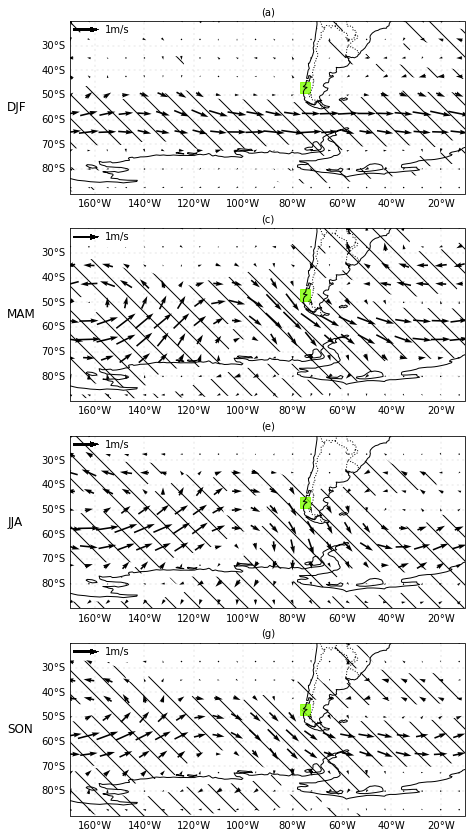

In [100]:
titleList=['(a)','(c)','(e)','(g)']
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)
nrows=4
ncols=1
clevs=np.arange(-1.0,1.1,0.1)
#color='PiYG'
cmap='bwr'
exp='obs'
decomp='original'
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(12,24))
axs=axs.flatten()

for i in np.arange(0,len(ruList),1):
    lons, lats = np.meshgrid(ruList[i][lon],ruList[i][lat])

#    CS1=axs[i].contourf(lons,lats, pwList[i][:,:],
#                transform=ccrs.PlateCarree(),
#                cmap=color,extent='both')
    #xw,yw=m(lons,lats)
    delta=3
 # Add arrows to show the wind vectors
    Q1=axs[i].quiver(lons[::delta,::delta],lats[::delta,::delta],ruList[i][::delta,::delta],rvList[i][::delta,::delta],pivot='middle', 
                     transform=ccrs.PlateCarree(),
        angles="xy",
        scale_units="xy",
        scale=0.10,color='black',
        #minshaft=4,
       # minlength=0.1,
       # width=0.1
             )
    #Q1=axs[i].quiver(lons,lats, ruList[i][:,:], rvList[i][:,:], pivot='middle', 
   #                  transform=ccrs.PlateCarree(),
   #     angles="xy",
    #    scale_units="xy",
   #     scale=0.25,color='black',
        #minshaft=4,
       # minlength=0.1,
       # width=0.1
   #          )
# Normalise the data for uniform arrow size
#u_norm = u / np.sqrt(u ** 2.0 + v ** 2.0)
#v_norm = v / np.sqrt(u ** 2.0 + v ** 2.0)
#plt.quiver(x, y, u_norm, v_norm, pivot='middle', transform=transform)
#plt.quiverkey(Q1, 1.2, 0.515, 2, 'arrow 1', coordinates='data')
    qk=axs[i].quiverkey(Q1,                      #Incoming quiver handle
              X=0.07, Y = 0.95,       #Determine the location of label, all limited to [0,1]
              U = 1,                   #Reference arrow length means the wind speed is 5m/s.
             angle = 0,            #Reference arrow placement angle. The default is 0,
             label='1m/s',        #Arrow's supplement: label's content + 
             labelpos='E',          #label is in which direction of the reference arrow; S means south
             color = 'black',labelcolor = 'black',fontproperties={'size': '10'})
    t = qk.text.set_backgroundcolor('white')
    levels=[0,0.1,1.0]
    cs = axs[i].contourf(lons,lats,pwList[i][:,:], transform=ccrs.PlateCarree(),levels=levels,
                 hatches=["\\", ""], alpha=0.)
        # Title each subplot with the name of the model
    axs[i].text(-0.16, 0.5, seasons[i],
    verticalalignment='center', horizontalalignment='left',
    transform=axs[i].transAxes,
    color='black', fontsize=12)
    geom = geometry.box(minx=-77,maxx=-73,miny=-44.7,maxy=-49.3)
    axs[i].add_geometries([geom], facecolor='chartreuse',edgecolor='chartreuse',crs=ccrs.PlateCarree(), alpha=0.8)
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
      linewidth=2, color='gray', alpha=0.1, linestyle=':')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylabels_left = True
    gl.set_ylocator=mticker.FixedLocator(np.arange(latS,latN,15),0)
    gl.set_xlocator = mticker.FixedLocator(np.arange(lonW,lonE,10),0)
    gl.set_xformatter = LongitudeFormatter
    gl.set_yformatter = LatitudeFormatter
    gl.set_xlabel_style = {'color': 'black'}
    gl.set_xlabel_style = {'color': 'black'}
    # Draw the coastines for each subplot
    axs[i].coastlines()
    axs[i].set_title(titleList[i],fontsize=10)
    axs[i].add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
    axs[i].add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='none'))
    axs[i].set_extent([lonW, lonE, latS,latN])
    # Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.20, top=0.66, left=0.25, right=0.75,
                    wspace=0.0000000005, hspace=0.20)
    # Add a colorbar axis at the bottom of the graph
    #([xmin,ymin,dx,dy])
#cbar_ax = fig.add_axes([0.2, 0.3, 0.6, 0.02])
    # Draw the colorbar
#cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s'%(units))
    ## Add a big title at the top
    #plt.suptitle('%s'%(seasons[i]),y=0.73)
#plt.suptitle('(a)',y=0.67)
plotname='spa_cor_%s_%s_%s_seasons_%s_%i-%i'%('wind925hPa',model,index_name,domain,iyr,fyr)
plt.savefig(plotsDir+plotname+'_MSO'+'.png',format='png')
plt.show()
